In [1]:
import pandas as pd
import numpy as np

# 화면에 출력하는 데이터 프레임의 최대 row 수를 100으로 설정합니다.
pd.set_option('display.max_rows', 100)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 100으로 설정합니다.
pd.set_option('display.max_columns', 500)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [3]:
df = pd.read_excel("1984-2018출입국국가별월별통계.xlsx", encoding='euc-kr', header=2)

In [4]:
drop_year_list = "1984년	1985년	1986년	1987년	1988년	1989년	1990년	1991년	1992년	1993년	1994년	1995년	1996년	1997년	1998년".split()
df = df.drop(drop_year_list, axis = 1)

In [5]:
year_month_list = df.columns.tolist()
year_month_list.remove('Country')
year_month_list.remove('국가명')

In [6]:
new_year_month_list = ['Country', '국가명']
for item in year_month_list:
    year = item.split()[0]
    year = year.split(".")[0]
    year = year.split("년")[0]
    year = year[-2:]
    
    month = item.split()[0]
    if "."in(month):
        month = month.split(".")[1]
    else:
        month = month.split("년")[1]
    month = month[:-1]
    new_item = str(year) + "_" +str(month)
    new_year_month_list.append(new_item)

In [7]:
df.columns = new_year_month_list

In [8]:
# 상단부 토탈 합계를 나타내는 데이터는 분리 취급
df_total_info = df.iloc[:4].drop(1, axis=0).reset_index().drop('index', axis=1)

#### 잘못 입력한 데이터 ( " " 나 "-" 등) 를 검출하고 0으로 전환 

In [9]:

df = df.fillna(0)
for index in df.index.tolist():
    for col in range(2, len(df.columns)):
        if type(df.iloc[index, col])  == str:
            print("==========")
            print("내용 :", df.iloc[index, col])
            print("데이터타입 :", type(df.iloc[index, col]))
            print("index, col (주소) :", index, ",", col)
            print("국가 :", df.loc[df.index[index],'국가명'])
            print("연도 :", df.columns[col])
            df.iloc[index, col] = 0.0
        elif type(df.iloc[index, col]) == np.float64:
            df.iloc[index, col].astype(int)
        else:
            pass

내용 : -
데이터타입 : <class 'str'>
index, col (주소) : 31 , 123
국가 : 시킴
연도 : 07_5
내용 :  
데이터타입 : <class 'str'>
index, col (주소) : 153 , 32
국가 : 안도라
연도 : 00_5


In [10]:
new_df = df.iloc[:, 2:].astype(int)

In [11]:
new_df['Country'] = df['Country']
new_df['국가명'] = df['국가명']

In [12]:
country_null_index = df.loc[df['Country'].isnull()].index.tolist()
country_null_index_below_index = [item + 1 for item in country_null_index]
country_null_index_upper_index = [item - 1 for item in country_null_index]
df.loc[df.index.isin(country_null_index_below_index) | df.index.isin(country_null_index_upper_index) ]

# 쭉 살펴보니... 찾았다 대륙 인덱스들
continental_index = [5, 41, 67, 126, 189, 222, 287]
continental_list = df.loc[df['Country'].index.isin(continental_index), 'Country'].tolist()

In [13]:
# 대륙 - 인덱스 를 표기한 dict 데이터 형성
mix_list = [None]*(len(continental_index)+len(continental_list))
mix_list[::2] = continental_index
mix_list[1::2] = continental_list

mix_dict = []

for i in range(0,len(mix_list),2):
    mix_dict.append((mix_list[i+1], mix_list[i]))

mix_dict = dict(mix_dict)
continental_dict=mix_dict
print("아시아의 인덱스는? ", continental_dict['ASIA'])
print("인덱스 5의 표기는? ", df.loc[df.index.isin([5]), 'Country' ])

아시아의 인덱스는?  5
인덱스 5의 표기는?  5    ASIA
Name: Country, dtype: object


In [14]:
continental_dict

{'ASIA': 5,
 'Middle East Asia': 41,
 'Americas': 67,
 'Europe': 126,
 'Oceania': 189,
 'AFRICA': 222,
 'Stateless': 287}

### 대륙마다 df를 자르자
- 대륙 칼럼을 추가
- 그 칼럼 토대로 loc 해서 자르면 쉬움

In [15]:
new_df['cont'] = ""
for key, value in continental_dict.items():
    new_df.iloc[value : , -1] = key

In [16]:
# 연도별 합은 별도의 리스트로 만들어서 열람하고자 할 때만 열어서 관리

except_year_columns = ["99_", "00_"]
for num in range(10):
    num_ = "0" + str(num) + "_"
    except_year_columns.append(num_)

for num in range(10,19):
    num_ = str(num) + "_"
    except_year_columns.append(num_)

#### 연도별 합을 통해 보고 싶다면

new_df_asia_year = new_df_asia[except_year_columns]

를 통해 연도별 집계만 볼 수 있다

#### 월별 추이를 다 보고 싶다면

except_year_columns를 drop시켜야함

In [17]:
# 연도별 합만 보기
new_df_year = new_df[except_year_columns]
new_df_year['국가명'] = new_df['국가명']
new_df_year['cont'] = new_df['cont']
new_df_year = new_df_year.set_index('국가명')
new_df_year = new_df_year.iloc[5:]

# 월별추이 보기
new_df_month = new_df.drop(except_year_columns, axis=1)
new_df_month = new_df_month.set_index('국가명')
new_df_month = new_df_month.iloc[5:]

#### 시각화 함수 만들기

In [47]:
def show_visitors(data, cont, country_list):
    # 원하는 대륙 선택
    if cont != 'global':
        if data == 'year':
            new_df_cont = new_df_year.loc[new_df_year['cont'] == cont]
            # 트랜스포즈해야 lineplot을 찍을 수 있다
            plot_data = new_df_cont.loc[new_df_cont.index.isin(country_list)].T
            #쓸데 없는 country, 대륙 파트 커팅 + 가끔 내용물이 이상하게 Object로 되어있더라?
            plot_data_cut = plot_data.iloc[:-1,:].astype(int)
            plt.figure(figsize=(18, 9))

        elif data == 'month':
            new_df_cont = new_df_month.loc[new_df_month['cont'] == cont]
            # 트랜스포즈해야 lineplot을 찍을 수 있다
            plot_data = new_df_cont.loc[new_df_cont.index.isin(country_list)].T
            #쓸데 없는 country, 대륙 파트 커팅 + 가끔 내용물이 이상하게 Object로 되어있더라?
            plot_data_cut = plot_data.iloc[:-2,:].astype(int)
            plt.figure(figsize=(50, 9))

        else:
            print('연도 보기 혹은 월별 보기를 다시 선택해주세요')
    else:
        if data == 'year':
            # 트랜스포즈해야 lineplot을 찍을 수 있다
            plot_data = new_df_year.loc[new_df_year.index.isin(country_list)].T
            #쓸데 없는 country, 대륙 파트 커팅 + 가끔 내용물이 이상하게 Object로 되어있더라?
            plot_data_cut = plot_data.iloc[:-1,:].astype(int)
            plt.figure(figsize=(18, 9))
    
        elif data == 'month':
            # 트랜스포즈해야 lineplot을 찍을 수 있다
            plot_data = new_df_month.loc[new_df_month.index.isin(country_list)].T
            #쓸데 없는 country, 대륙 파트 커팅 + 가끔 내용물이 이상하게 Object로 되어있더라?
            plot_data_cut = plot_data.iloc[:-2,:].astype(int)
            plt.figure(figsize=(50, 9))

        else:
            print('연도 보기 혹은 월별 보기를 다시 선택해주세요')


    plt.title('방한객 증감 추이', fontsize=20)
    plt.ylabel('방한객', fontsize=15)
    plt.xlabel('시간', fontsize=15)
    plt.xticks(rotation=90)
    
    for country in country_list:
        plt.plot(plot_data_cut.index, plot_data_cut[country], linestyle='--', linewidth=2) # 'dashed'
        # linestyle='--', '-', ':' (dashed, solid, dotted)
        # linewidth=1
    
    plt.legend(country_list ,fontsize=14, loc='best')
    plt.show()

#### 열람용 대륙별 국가 리스트 

어느 대륙에 무슨 국가가 있는지 한눈에 알기 어렵다?

대륙_list 를 통해 대륙별 국가 리스트를 한눈에 뽑아보고,

그 리스트는 방문객 총합 순으로 정렬되어 방문객이 높은 나라들 순으로 살펴볼 수 있다

In [19]:
asia_list = new_df_year.loc[new_df_year['cont'] == 'ASIA'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()
europe_list = new_df_year.loc[new_df_year['cont'] == 'Europe'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()
americas_list = new_df_year.loc[new_df_year['cont'] == 'Americas'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()
mid_east_asia_list = new_df_year.loc[new_df_year['cont'] == 'Middle East Asia'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()
oceania_list = new_df_year.loc[new_df_year['cont'] == 'Oceania'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()
africa_list = new_df_year.loc[new_df_year['cont'] == 'AFRICA'].iloc[:,:-1].sum(axis = 1, skipna = True).sort_values(ascending=False).index.tolist()

cont_list = [asia_list, europe_list, americas_list, mid_east_asia_list, oceania_list, africa_list]
for cont in cont_list:
    cont.remove(0)

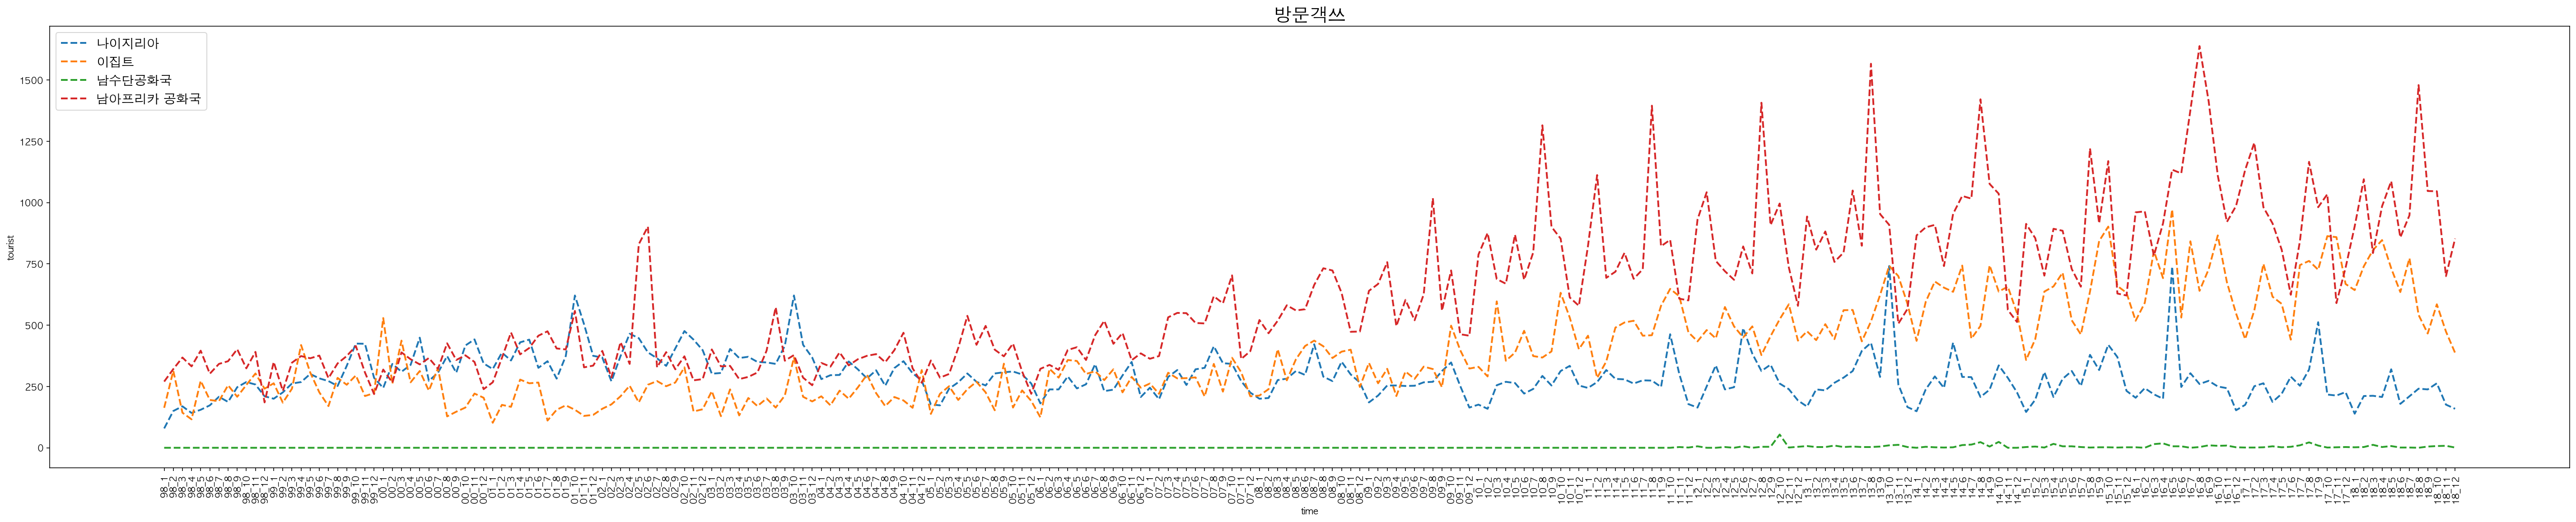

In [20]:
country_list = ['나이지리아', '이집트',  '남수단공화국',  '남아프리카 공화국']
show_visitors('month', 'AFRICA', country_list)

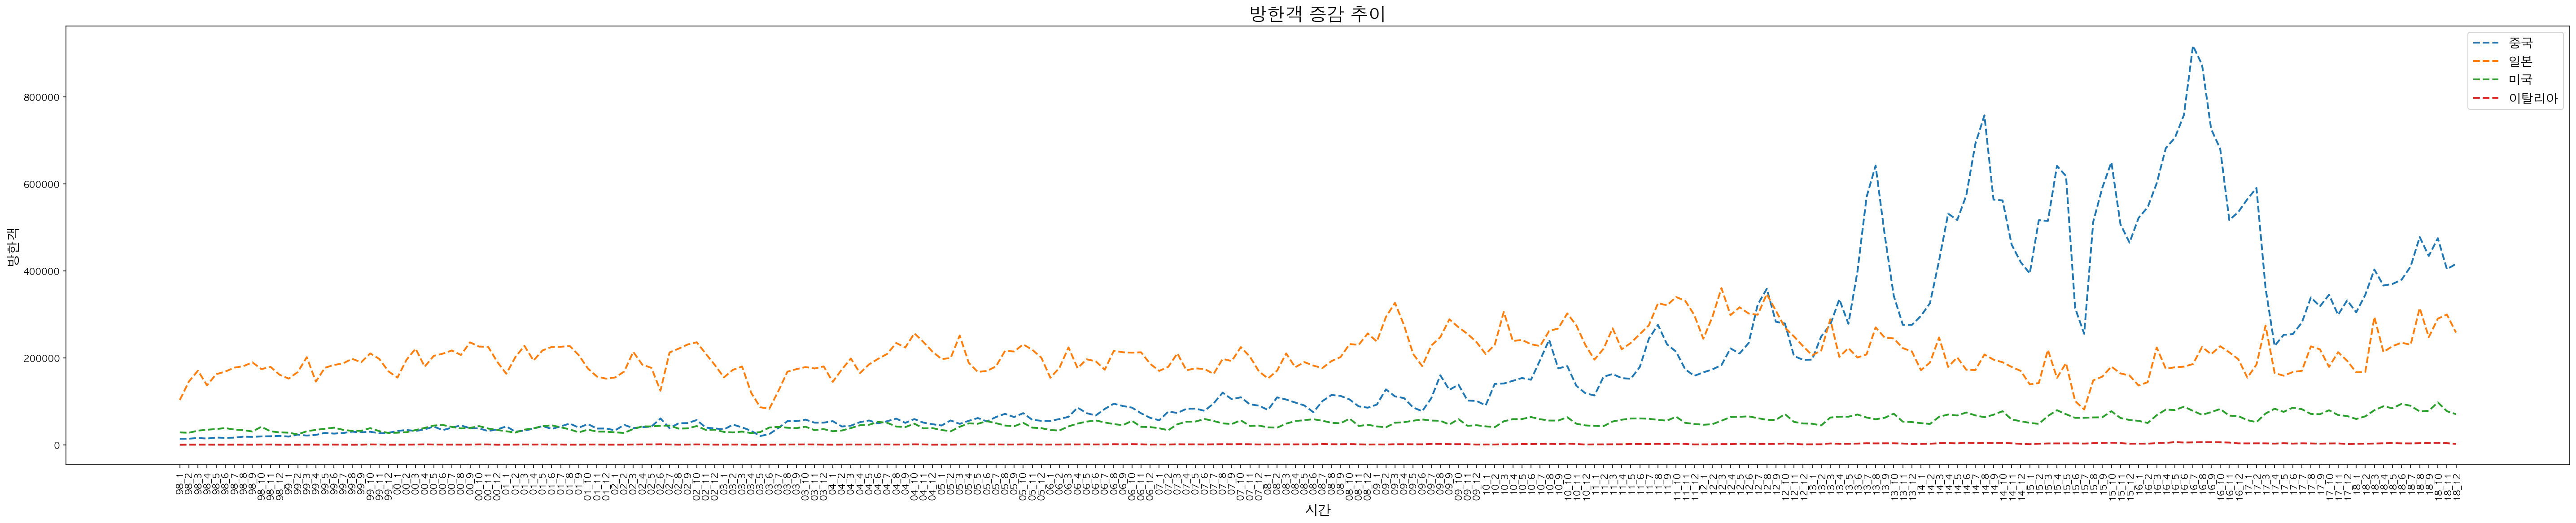

In [48]:
country_list = ['중국', '일본', '미국', '이탈리아']
show_visitors('month', 'global', country_list)

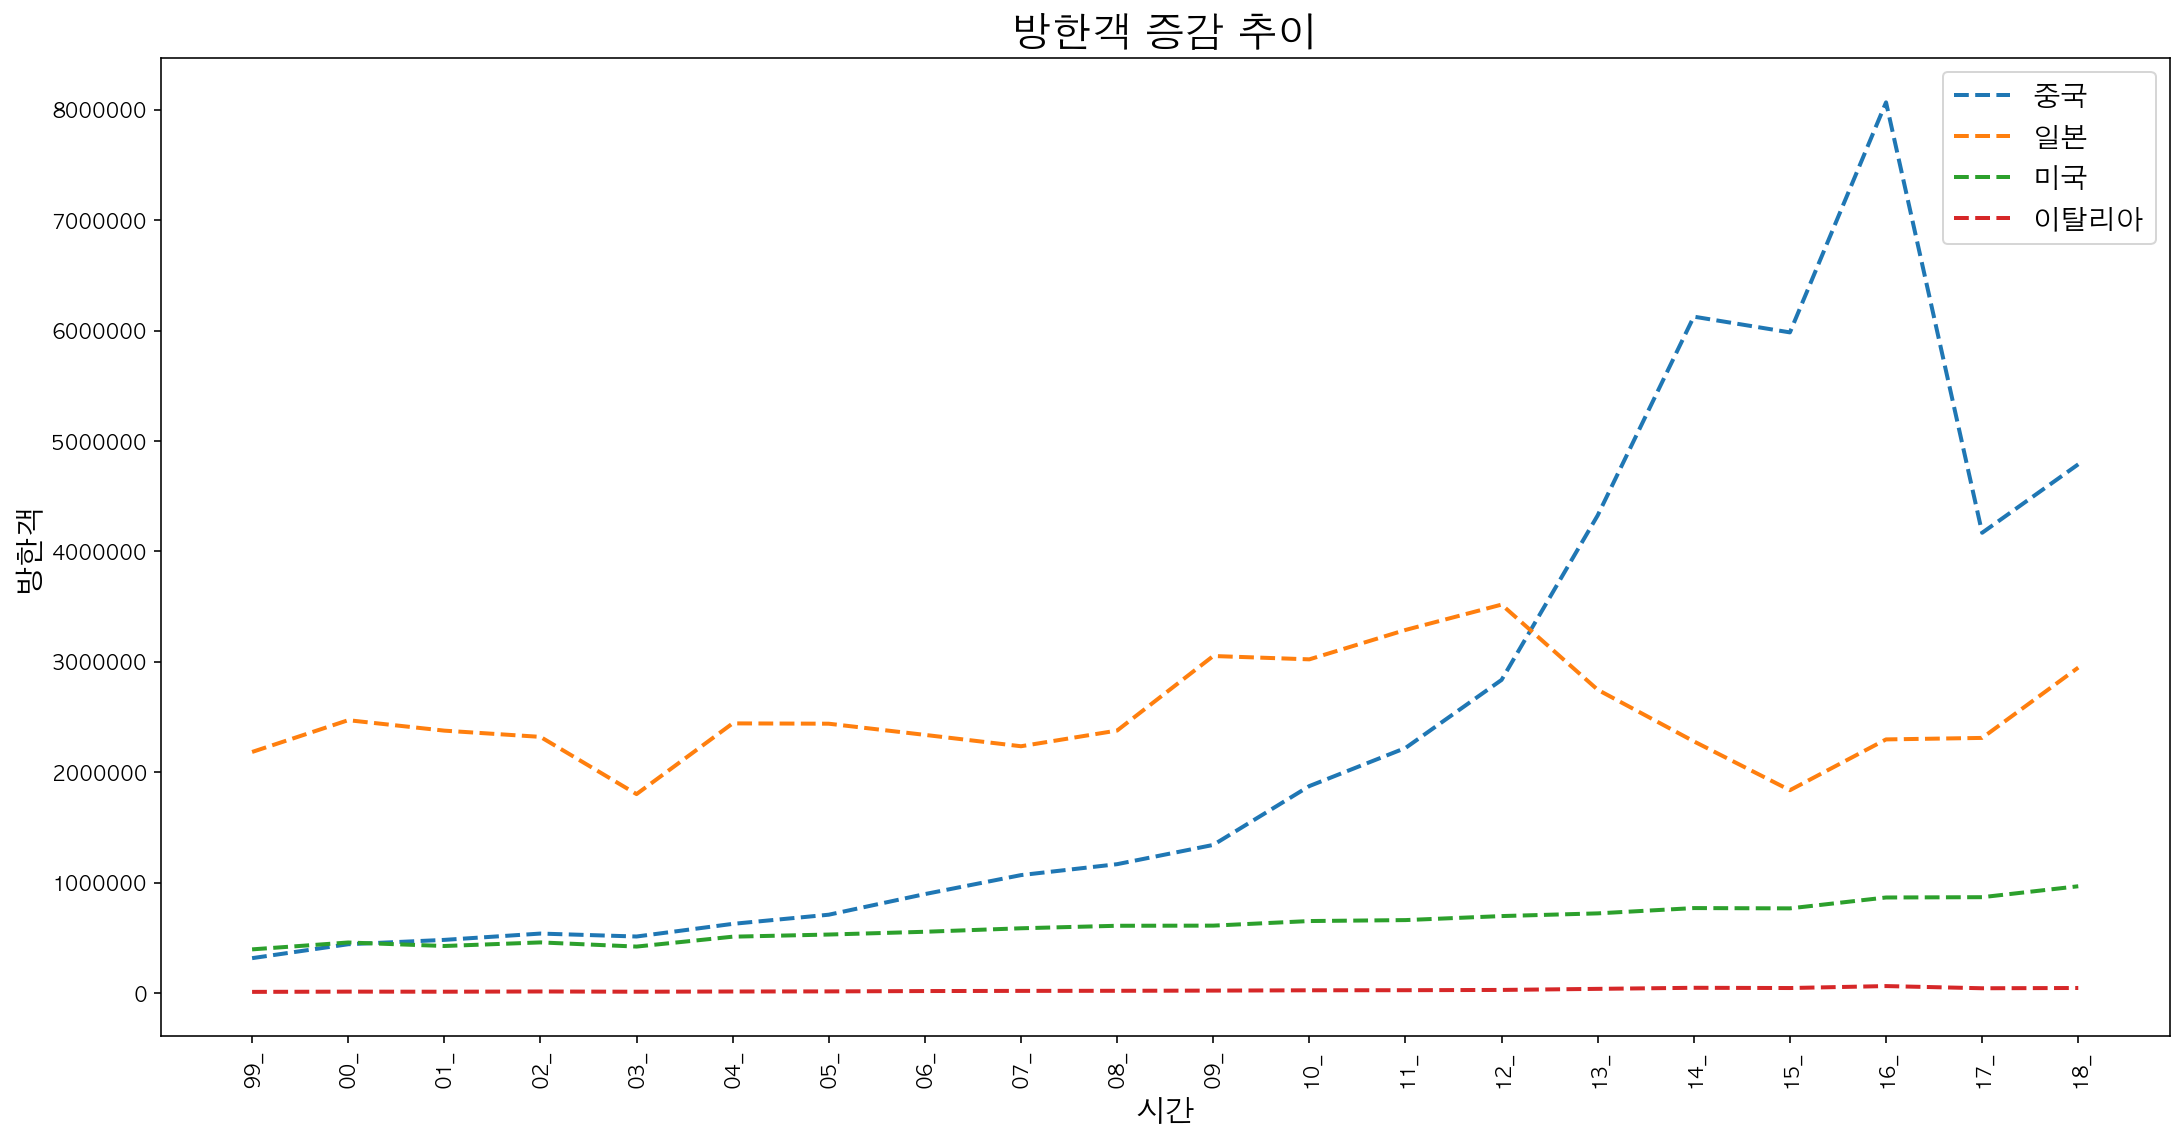

In [49]:
country_list = ['중국', '일본', '미국', '이탈리아']
show_visitors('year', 'global', country_list)

In [22]:

new_df['total'] = new_df.iloc[:,:-2].sum(axis = 1, skipna = True)
new_df = new_df.set_index('국가명')

In [23]:
top_list = new_df.sort_values(by='total',ascending=False).index.tolist()
remove_list = [0,0,0,0, '구주', '아프리카', '대양주', '미주', 'GCC6개국']
for item in remove_list:
    top_list.remove(item)

In [24]:
top_list[:10]

['일본', '중국', '(중국1)', '미국', '대만', '홍콩', '필리핀', '태국', '(한국계중국인)', '러시아']